In [1]:
from biom import load_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.feature_selection import SelectFromModel
import seaborn as sns

%matplotlib inline

/Users/shafferm/miniconda2/envs/scikit-learn_tutorial/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Intro to Machine Learning with Scikit-learn!
## reading in my data

In [2]:
table = load_table("otu_table.biom")
print("Number of Samples: %s" % table.shape[1])
print("Number of Observations: %s" % table.shape[0])

Number of Samples: 6000
Number of Observations: 10730


In [3]:
table.filter(table.ids(axis="sample")[table.sum(axis="sample")>1000], axis="sample")
table.norm(axis="sample")
table.filter(table.ids(axis="observation")[table.pa(inplace=False).sum(axis="observation")
                                           /table.shape[1]>.2], axis="observation")
print("Number of Samples: %s" % table.shape[1])
print("Number of Observations: %s" % table.shape[0])
table.to_json("scikit-learn_tutorial", open("otu_table.d1000.rel.s20.biom", 'w'))

Number of Samples: 5143
Number of Observations: 204


In [4]:
meta = pd.read_table("metadata.txt", index_col=0)
meta = meta.loc[table.ids(axis="sample")]
display(meta.head())

,BarcodeSequence,LinkerPrimerSequence,center_name,center_project_name,experiment_design_description,instrument_model,library_construction_protocol,linker,pcr_primers,platform,...,physical_specimen_remaining,psn,public,qiita_study_id,sample_type,scientific_name,sequencecenter,taxon_id,title,Description
#SampleID,,,,,,,,,,,,,,,,,,,,,
1928.SRS049355.SRX020682.SRR048316,TCAGTATTCGTC,CCGTCAATTCMTTTRAGT,HMPDACC,MHMP1,"samples from the human microbiome project, doi...",Missing: Not provided,16S rRNA gene pyrosequencing (454 Life Science...,Missing: Not provided,(FWD:CCTACGGGAGGCAGCAG; REV:CCGTCAATTCMTTTRAGT),LS454,...,False,700102958,True,1928,sebum,human skin metagenome,BCM,539655,"Structure, function and diversity of the healt...",HMP_SRS049355.SRX020682.SRR048316
1928.SRS020559.SRX019684.SRR041042,TCAGTTAACCGAATC,CCGTCAATTCMTTTRAGT,HMPDACC,MHMP1,"samples from the human microbiome project, doi...",Missing: Not provided,16S rRNA gene pyrosequencing (454 Life Science...,Missing: Not provided,(FWD:CCTACGGGAGGCAGCAG; REV:CCGTCAATTCMTTTRAGT),LS454,...,False,700095882,True,1928,sebum,human skin metagenome,BI,539655,"Structure, function and diversity of the healt...",HMP_SRS020559.SRX019684.SRR041042
1928.SRS017675.SRX019689.SRR041393,TCAGTGGTGAAC,CCGTCAATTCMTTTRAGT,HMPDACC,MHMP1,"samples from the human microbiome project, doi...",Missing: Not provided,16S rRNA gene pyrosequencing (454 Life Science...,Missing: Not provided,(FWD:CCTACGGGAGGCAGCAG; REV:CCGTCAATTCMTTTRAGT),LS454,...,False,700034690,True,1928,sebum,human skin metagenome,BI,539655,"Structure, function and diversity of the healt...",HMP_SRS017675.SRX019689.SRR041393
1928.SRS017673.SRX019689.SRR041484,TCAGACGAGAAC,CCGTCAATTCMTTTRAGT,HMPDACC,MHMP1,"samples from the human microbiome project, doi...",Missing: Not provided,16S rRNA gene pyrosequencing (454 Life Science...,Missing: Not provided,(FWD:CCTACGGGAGGCAGCAG; REV:CCGTCAATTCMTTTRAGT),LS454,...,False,700034688,True,1928,sebum,human skin metagenome,BI,539655,"Structure, function and diversity of the healt...",HMP_SRS017673.SRX019689.SRR041484
1928.SRS023637.SRX019689.SRR041407,TCAGAGGCGGC,CCGTCAATTCMTTTRAGT,HMPDACC,MHMP1,"samples from the human microbiome project, doi...",Missing: Not provided,16S rRNA gene pyrosequencing (454 Life Science...,Missing: Not provided,(FWD:CCTACGGGAGGCAGCAG; REV:CCGTCAATTCMTTTRAGT),LS454,...,False,700099940,True,1928,sebum,human skin metagenome,BI,539655,"Structure, function and diversity of the healt...",HMP_SRS023637.SRX019689.SRR041407


# Get our data and labels

In [5]:
X = table.to_dataframe().transpose()
display(X.head())

,909624,1042479,31235,1076557,4400260,4460404,925110,403853,4323393,4304901,...,4335578,858896,1075891,4318122,561636,951711,1059729,4443574,516611,4335864
1928.SRS049355.SRX020682.SRR048316,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.012168,0.000000,0.0,...,0.0,0.000000,0.000676,0.00029,0.000097,0.0,0.000386,0.0,0.0,0.0
1928.SRS020559.SRX019684.SRR041042,0.003797,0.0,0.0,0.0,0.003037,0.0,0.000000,0.000759,0.003037,0.0,...,0.0,0.000000,0.002278,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0
1928.SRS017675.SRX019689.SRR041393,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.001295,0.000000,0.0,...,0.0,0.000000,0.000809,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0
1928.SRS017673.SRX019689.SRR041484,0.000000,0.0,0.0,0.0,0.000150,0.0,0.000000,0.008123,0.000000,0.0,...,0.0,0.001955,0.001203,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0
1928.SRS023637.SRX019689.SRR041407,0.000000,0.0,0.0,0.0,0.000000,0.0,0.001805,0.000000,0.000000,0.0,...,0.0,0.002708,0.000000,0.00000,0.000903,0.0,0.000000,0.0,0.0,0.0


In [6]:
print(Counter(meta.scientific_name))
class_numbers = {name: i for i, name in enumerate(set(meta.scientific_name))}
y = np.array([class_numbers[name] for name in meta.scientific_name])

Counter({'human oral metagenome': 3020, 'human skin metagenome': 1336, 'human vaginal metagenome': 434, 'human gut metagenome': 353})


# Build and Random Forest Classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=3)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [8]:
# determine confusion matrix and get cross val f1 score and oob score
f1_score = cross_val_score(clf, X, y, cv=10, scoring='f1_weighted')
print(f1_score.mean())

0.959731306919


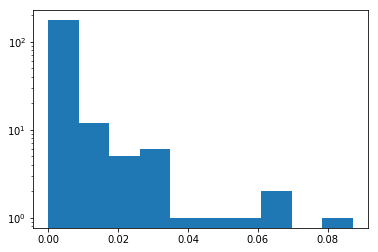

In [9]:
_ = plt.hist(clf.feature_importances_, log=True)

# Build Random Forest Classifier with Feature Selection via Random Forest

In [10]:
model = SelectFromModel(RandomForestClassifier(n_estimators=100, n_jobs=3))
model.fit(X, y)
X_new = model.transform(X)
features_used = X.columns[model.get_support()]

In [11]:
clf.fit(X_new, y)
f1_score = cross_val_score(clf, X_new, y, cv=10, scoring='f1_weighted')
print(f1_score.mean())

0.947112662984


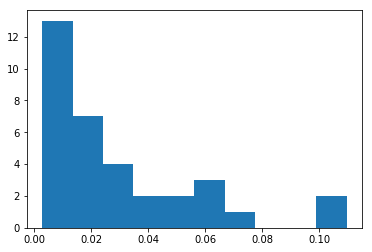

In [12]:
_ = plt.hist(clf.feature_importances_)

In [13]:
print(X_new.shape)

(5143, 34)


# Does do our top predictive OTUs separate on body site

In [14]:
X_new_df = pd.DataFrame(X_new[:,clf.feature_importances_>.02], index=X.index, 
                        columns=features_used[clf.feature_importances_>.02])
X_new_df['site'] = [meta.loc[i, 'scientific_name'].split()[1] for i in X_new_df.index]
print(X_new_df.shape)
display(X_new_df.head())

(5143, 18)


,403853,4350466,503354,462988,1039477,4447394,4422456,356733,949789,879972,4309323,855538,341460,336228,496787,1075891,561636,site
1928.SRS049355.SRX020682.SRR048316,0.012168,0.0,0.001545,0.000773,0.000579,0.840174,0.000000,0.007533,0.0,0.005987,0.000097,0.003959,0.000097,0.000000,0.006567,0.000676,0.000097,skin
1928.SRS020559.SRX019684.SRR041042,0.000759,0.0,0.000000,0.001519,0.000000,0.178436,0.000000,0.003797,0.0,0.000000,0.000000,0.000000,0.002278,0.007593,0.005315,0.002278,0.000000,skin
1928.SRS017675.SRX019689.SRR041393,0.001295,0.0,0.009063,0.006474,0.000162,0.337757,0.000324,0.004693,0.0,0.009225,0.000324,0.000486,0.000809,0.000000,0.007445,0.000809,0.000000,skin
1928.SRS017673.SRX019689.SRR041484,0.008123,0.0,0.008574,0.004964,0.001203,0.463598,0.000000,0.005415,0.0,0.013087,0.000451,0.002407,0.000903,0.000000,0.007822,0.001203,0.000000,skin
1928.SRS023637.SRX019689.SRR041407,0.000000,0.0,0.013538,0.013538,0.000000,0.157040,0.000903,0.002708,0.0,0.039711,0.000000,0.000000,0.014440,0.000000,0.007220,0.000000,0.000903,skin


IndexError: index 16 is out of bounds for axis 0 with size 16

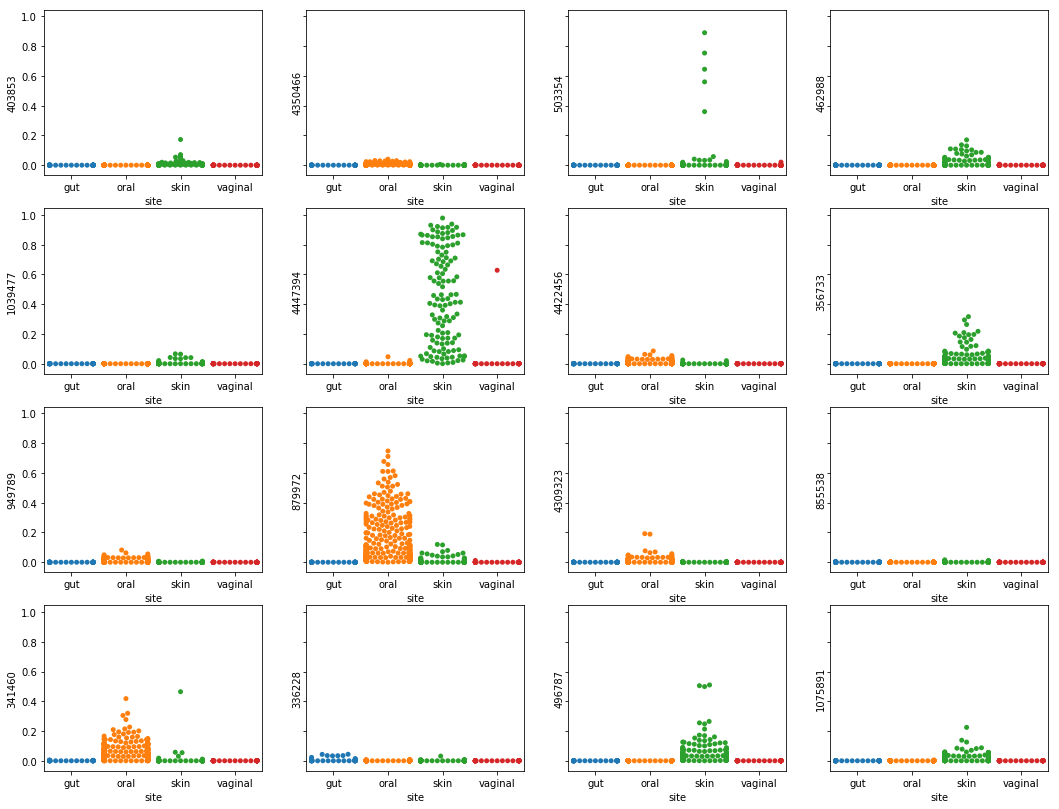

In [15]:
f, (plots) = plt.subplots(4, 4, sharey=True)
f.set_size_inches(18, 14)
plots = plots.reshape(16,)
for i, otu in enumerate(X_new_df.columns[:-1]):
    sns.swarmplot(data=X_new_df.sample(frac=.1, axis='index').sort_values('site'), x='site', y=otu, ax=plots[i])